In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from freeenergyframework import plotting, stats, wrangle, absolute

In [2]:
raw_results = wrangle.read_csv('../data/example.csv')
print(len(raw_results))

58


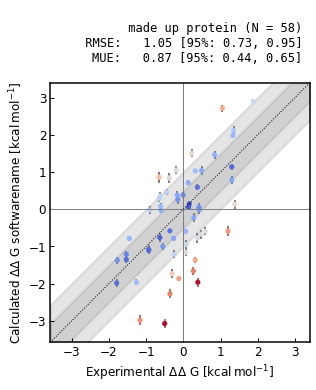

In [3]:
plotting.plot_DDGs(raw_results,method_name='softwarename',target_name='made up protein')

The above is the raw data of simulations that have been run, however the direction of the simulation is run in is arbitrary, and any data point could equally be plotted in the opposite quadrant. This means that correlation statistics aren't robust for these methods.

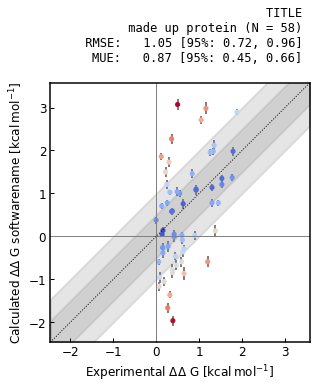

In [4]:
plotting.plot_DDGs(raw_results,method_name='softwarename',map_positive=True,target_name='made up protein',title='TITLE')

Create a FEMap object from the data:

In [5]:
network = wrangle.FEMap('../data/example.csv')

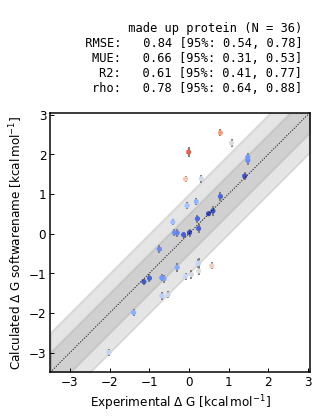

In [6]:
plotting.plot_DGs(network.graph,method_name='softwarename',target_name='made up protein',filename='absolute.png')

MLE has been used to convert the relative results into absolute ones, error bars are plotted, but very small (maybe a bug?... double check).
The molecule that is set to zero is completely arbitrary, if this is to be shifted to the true results then we need one known experimental values to be entered (to keep input simple this isn't currently a 'known' to the data). But the shift will do nothing to the statistics.

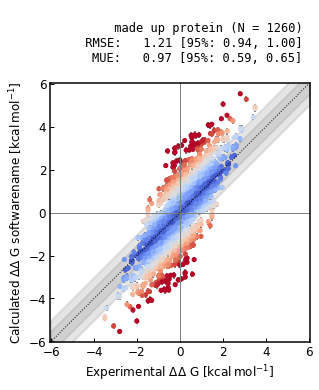

In [7]:
plotting.plot_all_DDGs(network.graph,method_name='softwarename',target_name='made up protein')

/opt/anaconda3/envs/off-demo/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

/opt/anaconda3/envs/off-demo/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



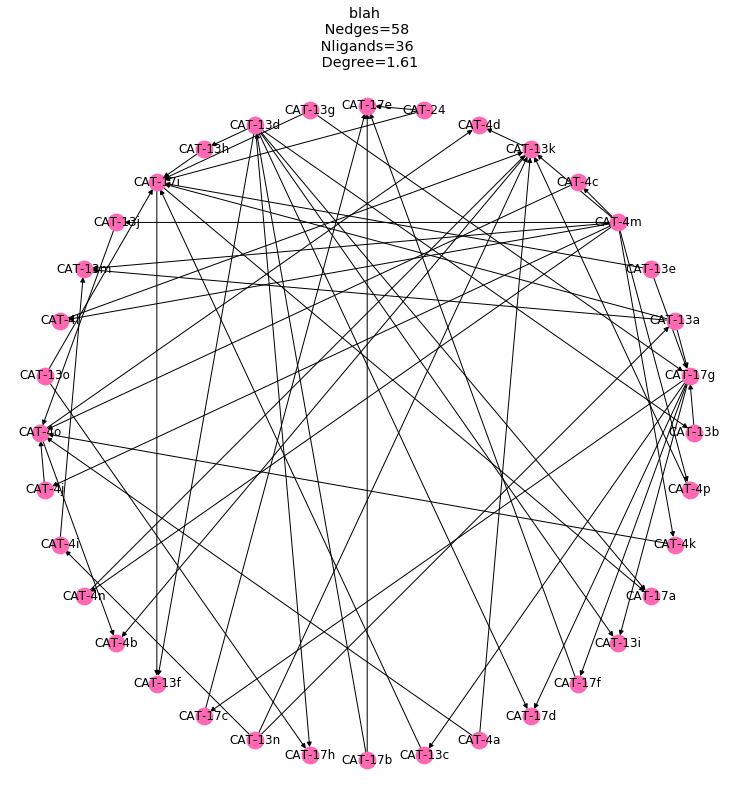

In [8]:
network.draw_graph(title='blah')

In [9]:
for x in network.graph.nodes(data=True):
    print(x)

(0, {'f_i_exp': 0.0, 'df_i_exp': 0.009016479348138918, 'f_i_calc': 0.0, 'df_i_calc': 0.10298265270254667})
(1, {'f_i_exp': -0.6200000000000001, 'df_i_exp': 0.006177396161483179, 'f_i_calc': -0.08514471990417039, 'df_i_calc': 0.06974040707254509})
(2, {'f_i_exp': 0.27999999999999914, 'df_i_exp': 0.005746098426879163, 'f_i_calc': 0.12434913418918814, 'df_i_calc': 0.06634945975707228})
(3, {'f_i_exp': -0.8399999999999976, 'df_i_exp': 0.008801255113665809, 'f_i_calc': -1.5157540111310024, 'df_i_calc': 0.09905155826710017})
(4, {'f_i_exp': -0.030000000000002913, 'df_i_exp': 0.007668518605136939, 'f_i_calc': 0.4317987382830759, 'df_i_calc': 0.08959799229915333})
(5, {'f_i_exp': 1.269999999999997, 'df_i_exp': 0.010257775012479566, 'f_i_calc': 1.4697625378812396, 'df_i_calc': 0.1109229030650896})
(6, {'f_i_exp': -0.5800000000000027, 'df_i_exp': 0.0077244024138502, 'f_i_calc': -0.35493411294743704, 'df_i_calc': 0.09107943588485182})
(7, {'f_i_exp': 0.009999999999998899, 'df_i_exp': 0.0102315352